In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Replace The Connection With Your's 

In [2]:
DB_CONFIG = {
    'host': 'localhost',
    'database': 'SQLTEST',
    'user': 'postgres',
    'password': 'Admin'
}


In [3]:

def get_db_connection():
    try:
        conn = psycopg2.connect(
            host=DB_CONFIG['host'],
            database=DB_CONFIG['database'],
            user=DB_CONFIG['user'],
            password=DB_CONFIG['password']
        )
        return conn
    except Exception as e:
        print(f"Error connecting to the database: {e}")
        return None


In [4]:

def fetch_data(query):
    conn = get_db_connection()
    if conn:
        try:
            df = pd.read_sql_query(query, conn)
            conn.close()
            return df
        except Exception as e:
            print(f"Error executing query: {e}")
            conn.close()
            return None

In [5]:
queries = {
    'total_users': """
        SELECT COUNT(*) AS total_users FROM public.users;
    """,
    'distinct_users_in_cart': """
        SELECT COUNT(DISTINCT user_id) AS distinct_users_in_cart FROM public.groups_carts;
    """,
    'participation_rate': """
        SELECT ROUND(
            (SELECT COUNT(DISTINCT user_id) FROM public.groups_carts)::decimal / 
            (SELECT COUNT(*) FROM public.users) * 100, 2
        ) AS participation_rate;
    """,
    'participation_over_time': """
        SELECT 
            DATE(created_at) AS participation_date, 
            COUNT(DISTINCT user_id) AS distinct_users
        FROM public.groups_carts
        GROUP BY DATE(created_at)
        ORDER BY DATE(created_at);
    """
}

In [6]:
total_users = fetch_data(queries['total_users'])
distinct_users_in_cart = fetch_data(queries['distinct_users_in_cart'])
participation_rate = fetch_data(queries['participation_rate'])
participation_over_time = fetch_data(queries['participation_over_time'])

C:\Users\huawei\AppData\Local\Temp\ipykernel_1500\635988597.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [7]:
sns.set(style="whitegrid")

# 1. Total Users and Distinct Users in Cart

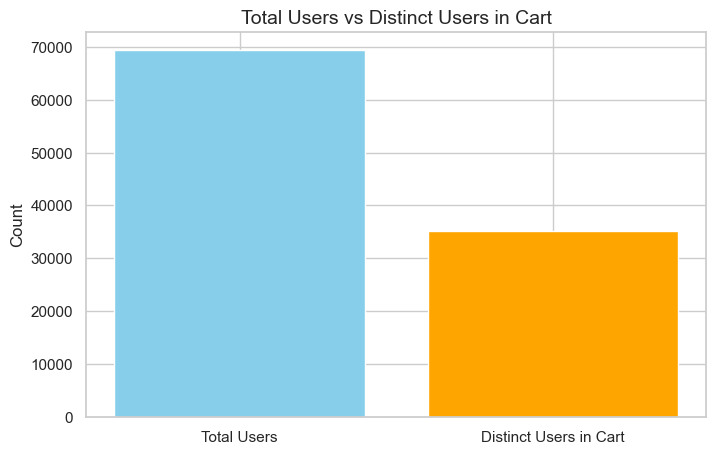

In [8]:


plt.figure(figsize=(8, 5))
values = [
    total_users['total_users'].iloc[0], 
    distinct_users_in_cart['distinct_users_in_cart'].iloc[0]
]
labels = ['Total Users', 'Distinct Users in Cart']
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Total Users vs Distinct Users in Cart', fontsize=14)
plt.ylabel('Count')
plt.show()


# 2. Participation Rate

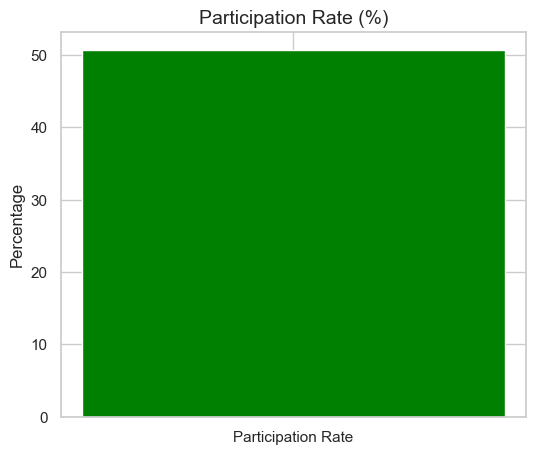

In [9]:

plt.figure(figsize=(6, 5))
plt.bar(['Participation Rate'], [participation_rate['participation_rate'].iloc[0]], color='green')
plt.title('Participation Rate (%)', fontsize=14)
plt.ylabel('Percentage')
plt.show()


# 3. Participation Over Time

c:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


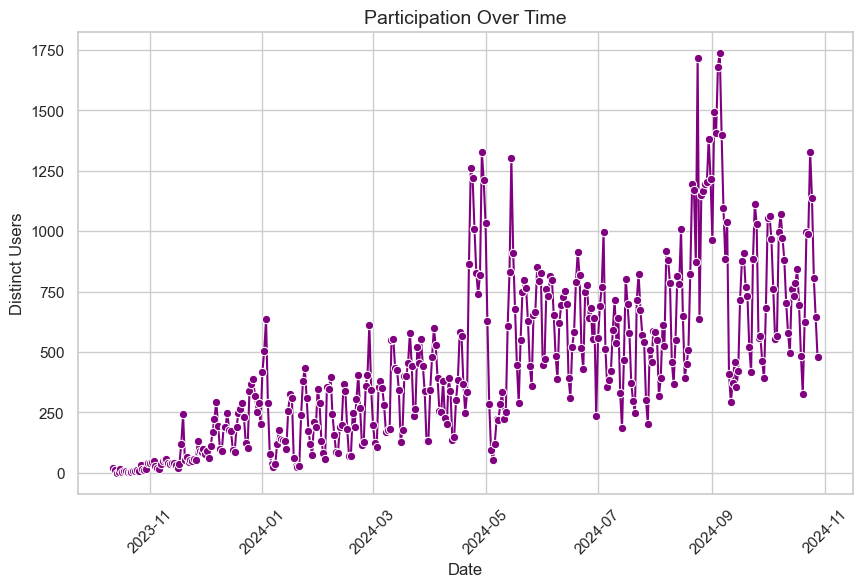

In [10]:


plt.figure(figsize=(10, 6))
sns.lineplot(
    x=participation_over_time['participation_date'], 
    y=participation_over_time['distinct_users'], 
    marker='o', color='purple'
)
plt.title('Participation Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Distinct Users')
plt.xticks(rotation=45)
plt.show()